# Homework 2
## B053040014 陳鵬宇
---
### Question 1

### Proof:
Forward:$f(x_{i+1}) = f(x_i+h) =  f(x_i) + f'(x_i)h + \dfrac{f''(x_i)}{2!}h^2 + R_2(h)\tag{1}$
Backward: $\begin{align*}
            f(x_{i-1}) &= f(x_i-h) =  f(x_i) + f'(x_i)(-h) + \dfrac{f''(x_i)}{2!}(-h)^2 + R_2(-h) \\
                       &= f(x_i) - f'(x_i)h + \dfrac{f''(x_i)}{2!}h^2 + R_2(-h) \tag{2}\\
           \end{align*}$

where $R_2(\alpha) = \dfrac{f^{(3)}(x_i)}{3!}\alpha^3 + \dots$

From $(1)$ and $(2)$: 

$\begin{align*}
        f(x_i) &= f(x_{i+1}) - f'(x_i)h - \dfrac{f''(x_i)}{2!}h^2 - R_2(h)\\
               &= f(x_{i-1}) + f'(x_i)h - \dfrac{f''(x_i)}{2!}h^2 - R_2(-h)
\end{align*}$

$\begin{align*}
        2f'(x_i)h &= f(x_{i+1}) - \dfrac{f''(x_i)}{2!}h^2 - R_2(h) 
                   - \bigl(f(x_{i-1}) - \dfrac{f''(x_i)}{2!}h^2 - R_2(-h)\bigr)\\
                  &= f(x_{i+1}) - f(x_{i-1}) - R_2(h) + R_2(-h)\\
                  &= f(x_{i+1}) - f(x_{i-1}) - 2\dfrac{f^{(3)}(x_i)}{3!}h^3 + \dots \\
                  &= f(x_{i+1}) - f(x_{i-1}) + O(h^3)
\end{align*}$

$\begin{align*}
        f'(x_i) &= \dfrac{f(x_{i+1}) - f(x_{i-1}) + O(h^3)}{2h}\\
                &= \dfrac{f(x_{i+1}) - f(x_{i-1})}{2h} + O(h^2), Q.E.D.
\end{align*}$

### Question 2
#### a.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
def function_q2(x):
    y = 10*np.cos(x*3*np.pi/2)*np.exp(-1*x) + x**6 - 1
    return y

def question_2a(l,r,N):
    x = np.linspace(l,r, num=N)
    y = function_q2(x)
    plt.plot(x,y,label='function')
    plt.plot(x,np.zeros(N),label='x-axis')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('$f(x) = 10\ cos(\dfrac{3\pi}{2}x)\ e^{-x} + x^6 -1$')
    plt.legend()
    plt.show()

2(a):


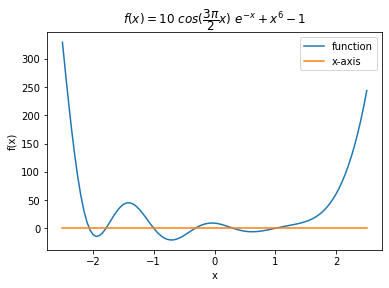

    Based on the curve, we can see that there are 6 points that the function intersects with x-axis, so
there should be 6 roots in the interval. There should be other roots because there is a cosine function
in f(x) which makes it periodically ,and there are no other funcitons in f(x) will elimate the periodicity.


In [3]:
print("2(a):")
N = 100
question_2a(-2.5,2.5,N)
print('    Based on the curve, we can see that there are 6 points that the function intersects with x-axis, so')
print('there should be 6 roots in the interval. There should be other roots because there is a cosine function')
print('in f(x) which makes it periodically ,and there are no other funcitons in f(x) will elimate the periodicity.')

b.

In [11]:
def bisection(func,l=0,r=1, criteria=1e-4):
    assert func(l)*func(r) < 0 and r >= l, 'Illegal interval'
    
    relative_errors=[]
    # Add initial error=100%
    relative_errors.append(1.00)
    origin_error = abs(r-l)
    
    i=0
    
    while(abs(relative_errors[-1]) > criteria):
        #print(relative_errors[-1],' ')
        mid = (l+r)/2
        
        if(func(mid)*func(l) < 0):
            r = mid
        elif(func(mid)*func(r) < 0):
            l = mid
        else:
            raise PrecisionError('Underflow when finding mid point')
        
        # Relative error in this iteration
        relative_errors.append( abs(l-r)/origin_error )
        i+=1
        if(i>200):
            print('Exceed 200 iteration. Exiting..')
            break
    return relative_errors

def false_position(func,l=0,r=1, criteria=1e-4):
    assert func(l)*func(r) < 0 and r >= l, 'Illegal interval'
    
    relative_errors=[]
    # Add initial error=100%
    relative_errors.append(1.00)    
    origin_error = abs(r-l)
    i=0
    
    while(abs(relative_errors[-1]) > criteria):
        # print('l=',l,' ,r=',r,' ,prev_relative_errors = ',relative_errors[-1],' ')
        # p is the point that determined by false position method
        p = r - (func(r)*(r-l))/(func(r) - func(l))
        
        if(func(p)*func(r) > 0):
            r = p
        elif(func(p)*func(l) > 0):
            l = p
        else:
            raise PrecisionError('Underflow when finding p')
        
        # Relative error in this iteration
        relative_errors.append( abs(l-r)/origin_error )
        i+=1
        if(i>200):
            print('Exceed 200 iteration. Exiting..')
            break
        
    return relative_errors

In [12]:
def question_2b(func,l=0,r=0.5,criteria=1e-4):
    #print('bisection:')
    
    bisection_E_a = bisection(func,l,r,criteria)
    bisection_E_a = [i*100  for i in bisection_E_a]
    bisection_x = [i for i in range(len(bisection_E_a))]

    #print('false_position:')
    false_position_E_a = false_position(func,l,r,criteria)
    false_position_E_a = [i*100  for i in false_position_E_a]
    false_position_x = [i for i in range(len(false_position_E_a))]

    plt.plot(bisection_x,bisection_E_a,label='bisection')
    plt.plot(false_position_x,false_position_E_a,label='false_position')

    plt.xlabel('iteration')
    plt.ylabel('$E_a(\%)$')
    plt.title('Bracketing Method Experiment')
    plt.legend()
    plt.show()

2(b):


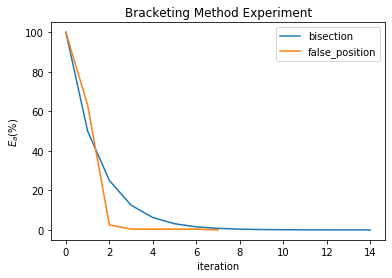

Apprently, false position method converges faster than bisection method in this case


In [13]:
print('2(b):')

question_2b(func=function_q2, l=0, r=0.5, criteria=1E-4)

print('Apprently, false position method converges faster than bisection method in this case')

2(c):
Exceed 200 iteration. Exiting..


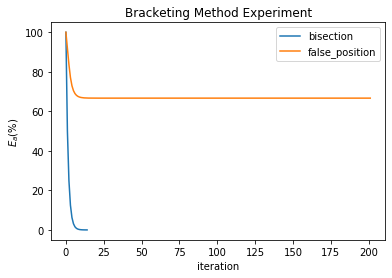

Bracketing [0.5,2] can't converge more. As my experiment, if right interval exceeds 1.4746989, it will not converges;
but if within, it will still converges below stopping criteria!


In [28]:
print('2(c):')
question_2b(func=function_q2, l=0.5, r=2, criteria=1e-4)


print('Bracketing [0.5,2] can\'t converge more. As my experiment, if right interval exceeds 1.4746989, it will not converges;')
print('but if within, it will still converges below stopping criteria!')

2(c) extra:


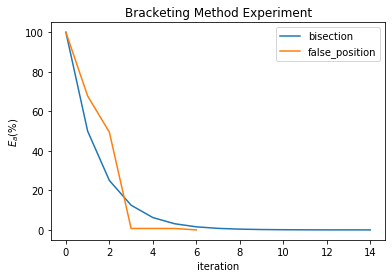

Exceed 200 iteration. Exiting..


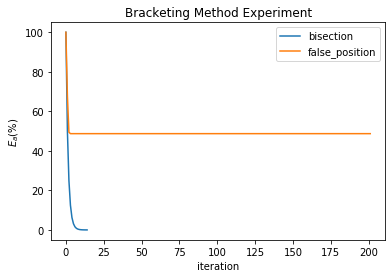

In [15]:
print('2(c) extra:')
question_2b(func=function_q2, l=0.5, r=1.4746989, criteria=1e-4)
question_2b(func=function_q2, l=0.5, r=1.474699, criteria=1e-4)

### Question 3
#### a.

In [16]:
# this mysterious modulation only applies to x- and y-component with an exponential modulation
def D_modulation(v,t,T2,T1):
    '''  Parameters:
            v :np.array 
                Input vector of dimension 3.
                
            t, T2 ,T1: integer or floating point
                Parameters of D_modulation.
    ''' 
    exp_mod = np.array([ 
        [np.exp(-t/T2),            0, 0],
        [            0,np.exp(-t/T2), 0],
        [            0,            0, 1]   
    ])
    
    scalar = np.array([0, 0, 1-np.exp(-t/T1)])
    
    result = np.add(np.dot(exp_mod,v),scalar)
    
    return result

#### b.

In [17]:
def crusher(v):
    '''  Parameters:
            v :np.array 
                Input vector of dimension 3.
    ''' 
    c = np.array([ 
        [ 0, 0, 0],
        [ 0, 0, 0],
        [ 0, 0, 1]   
    ])
    return np.dot(c,v)

#### c.

In [18]:
# Rotation v with angle relatively to x-axis
def Rx(v,angle):
    # v should be a np.array of dimension 3
    # angle should be degree
    assert v.ndim!=3 ,"Input vector of function \"Rx\" should have dimension of 3"
    
    # Convert angle to radian
    a_to_r = math.radians(angle)
    rx_matrix = np.array([
        [ 1,             0,                0 ],
        [ 0,np.cos(a_to_r),-1*np.sin(a_to_r) ],
        [ 0,np.sin(a_to_r),   np.cos(a_to_r) ]
    ])
    
    result = np.matmul(rx_matrix,v)
    return result

# Rotation v with angle relatively to y-axis
def Ry(v,angle):
    # v should be a np.array of dimension 3
    # angle should be degree
    assert v.ndim!=3 ,"Input vector of function \"Ry\" should have dimension of 3"
    
    # Convert angle to radian
    a_to_r = math.radians(angle)
    rx_matrix = np.array([
        [   np.cos(a_to_r),             0,np.sin(a_to_r) ],
        [                0,             1,             0 ],
        [-1*np.sin(a_to_r),             0,np.cos(a_to_r) ]
    ])
    
    result = np.matmul(rx_matrix,v)
    return result

# Rotation v with angle relatively to z-axis
def Rz(v,angle):
    # v should be a np.array of dimension 3
    # angle should be degree
    assert v.ndim!=3 ,"Input vector of function \"Rz\" should have dimension of 3"
    
    # Convert angle to radian
    a_to_r = math.radians(angle)
    rx_matrix = np.array([
        [np.cos(a_to_r),-1*np.sin(a_to_r), 0 ],
        [np.sin(a_to_r),   np.cos(a_to_r), 0 ],
        [             0,                0, 1 ]
    ])
    
    result = np.matmul(rx_matrix,v)
    return result


def S_xy(v):
    assert v.size >=2
    return math.sqrt(v[0]**2 + v[1]**2)

In [19]:
    def procedure_3c(v, angle_x=0, angle_y=0, angle_z=0, t=250, T2=200, T1=900, N=500):
    '''  Parameters:
            v :np.array 
                Input vector of dimension 3.
                
            angle_x,angle_y,angle_z: integer or floating point
                Angles of rotation.
                
            t, T2 ,T1: integer or floating point
                Parameters of D_modulation.
                
            N: integer
                Number of iteration that applying of D modulation 
    ''' 
    assert v.ndim!=3 ,"Input vector should have dimension of 3"
    result = 0
    for i in range(1,501):
        v = Rz(Ry(Rx(v,angle_x),angle_y),angle_z)
        v = D_modulation(v,t,T2,T1)
        
        if(i==500):
            result = S_xy(v)
        else:
            v = crusher(v)

    return result

In [20]:
def question_3c(theta=30):
    v = np.array([0,0,1])
    r = procedure_3c(v, t=250, T2=200, T1=900, angle_x=theta, angle_y=0, angle_z=0, N=500)
    return r

In [21]:
print('3(c):')
print(question_3c(theta=30))

3(c):
0.25933052266243123


#### d.

In [22]:
def question_3d(l,r,N=1000):
    x = np.linspace(l,r,N)
    y = [question_3c(i) for i in x]
    plt.plot(x,y)
    plt.xlabel('Angle')
    plt.ylabel('Result of D modulation procedure')
    plt.title('Simulation of Scan Parameters')
    plt.show()

3(d):


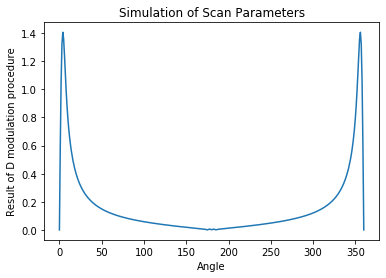

In [23]:
print('3(d):')
question_3d(0,360,360)

In [24]:
print('Accroding to the graph, the optimal theta is about 175 degree.')

Accroding to the graph, the optimal theta is about 175 degree.


#### e.

In [116]:
def question_3e(l,r,N=1000):
    x = np.linspace(l,r,N)
    y = []
    result_record = np.full(len(x),np.nan)
    
    # Approximate minimum will be the centered finite-difference approach that being most near to 0
    #approximate_minimum = np.Inf
    #approximate_minimum_index = -1
    
    for i in range(len(x)):
        if(np.isnan(result_record[(i+1)%N])):
            result_record[(i+1)%N] = question_3c(x[(i+1)%N])
                                         
        if(np.isnan(result_record[(i-1)%N])):
            result_record[(i-1)%N] = question_3c(x[(i-1)%N])
                                         
        tmp = (result_record[(i+1)%N]-result_record[(i-1)%N])/(2*( x[(i+1)%N]-x[(i-1)%N]))
        #if(abs(tmp) < approximate_minimum):
            ##approximate_minimum_index = i
            #approximate_minimum = abs(tmp)
        y.append(tmp)
    
    #approximate_minimum_index = i*360/N
    #print(approximate_minimum_index,' is the approximate minimum angle.')
    plt.plot(x,y)
    plt.xlabel('Angle')
    plt.ylabel('First Derivative of the result of D modulation procedure')
    plt.title('First Derivative of the Simulation of Scan Parameters')
    plt.show()

3(e):


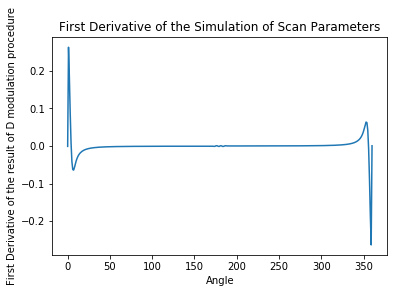

In [61]:
print('3(e):')
question_3e(0,360,360)

#### f.

In [62]:
def g(x,h=0.01):
    '''  Parameters:
        x: scalar
            The input value of function, in degree.
        h: scalar
            Step size, used to approximate g(x) 
    '''
    return (question_3c(x+h) - question_3c(x-h)) / (2*h)
    
def secant_method(func,x0,x1,criteria=1e-4):
    '''Parameters:
        func: function that return a scalar
            The function that we want to approximate with secant method
        
        x0, x1: scalars
            Initial guesses
        
        criteria: scalar
            Stopping criterion
    '''
    theta_list = []
    epsilon_a_list = []
    
    current_theta = x1
    current_epsilon_a = 1.00
    
    theta_list.append(current_theta)
    epsilon_a_list.append(current_epsilon_a)
    initial_interval = abs(x0-x1)
    
    x_i = x0
    x_j = x1
    prev_f_x = func(x_i)
    while(current_epsilon_a > criteria):
        current_f_x = func(x_j)
        current_theta = x_j - (current_f_x*(x_i-x_j))/(prev_f_x-current_f_x)
        current_epsilon_a = abs(x_i-x_j)/initial_interval
        
        theta_list.append(current_theta)
        epsilon_a_list.append(current_epsilon_a)
            
        x_i = x_j
        x_j = current_theta
        prev_f_x = current_f_x
        
        
    return theta_list, epsilon_a_list

In [97]:
def question_3f(x0,x1):
    '''  Parameters:
        x0, x1: scalars
            Initial guesses  
    '''
    theta_list, epsilon_a_list = secant_method(g,x0,x1,criteria=1e-4)
    df = pd.DataFrame({'Theta': theta_list,
                  'Epsilon_a(%)': [i*100 for i in epsilon_a_list] 
                 })
    return df

In [98]:
print('3(f):')
df = question_3f(5,10)

3(f):


In [114]:
df

,Theta,Epsilon_a(%)
0,10.000000,100.000000
1,40.281589,100.000000
2,42.371030,605.631778
3,62.946513,41.788827
4,81.872162,411.509647
5,114.790266,378.512980
6,165.200596,658.362092
7,295.879151,1008.206602
8,194.303807,2613.571101
9,153.575257,2031.506886


#### g.

In [90]:
print('3(g):')

3(g):


In [91]:
def quesiton_3e(t,T1):
    return np.arccos(np.exp(-t/T1))

In [115]:
print('Answer using analytical method:',quesiton_3e(250,900))
print('Ansewr using second method:',df.iloc[-1,0])

Answer using analytical method: 0.7113746317093453
Ansewr using second method: 177.71512717848188
